<a href="https://colab.research.google.com/github/VishalPotdar-ds/Airbnb2019_Project-/blob/main/Airbnb_Project_By_Vishal_Potdar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **AirBnb Booking Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**  Vishal Mahadev Potdar


# **Project Summary -**

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 100,000 cities and 220 countries worldwide. For hosts, it's a way to earn money while protecting their property from potential damage. However, for guests, it's a risky venture that they should avoid.

For this project we are analyzing Airbnb’s New York City(NYC) data of 2019. NYC is not only the most famous city in the world but also top global destination for visitors drawn to its museums, entertainment, restaurants and commerce. According to the Office of New York State Comptroller, NYC hosted 66.6 million visitors in 2019.

Data analysis on thousands of listings provided through Airbnb is a crucial factor for the company. Our main objective is to find out the key metrics that influence the listing of properties on the platform. For this, we will explore and visualize the dataset from Airbnb in NYC using basic exploratory data analysis (EDA) techniques. We have found out the distribution of every Airbnb listing based on their location, including their price range, room type, listing name, and other related factors. We have analyzed this dataset from different angles and have come up with interesting insights. This can help in making strategic data-driven decisions by the marketing team, finance team and technical team of Airbnb.

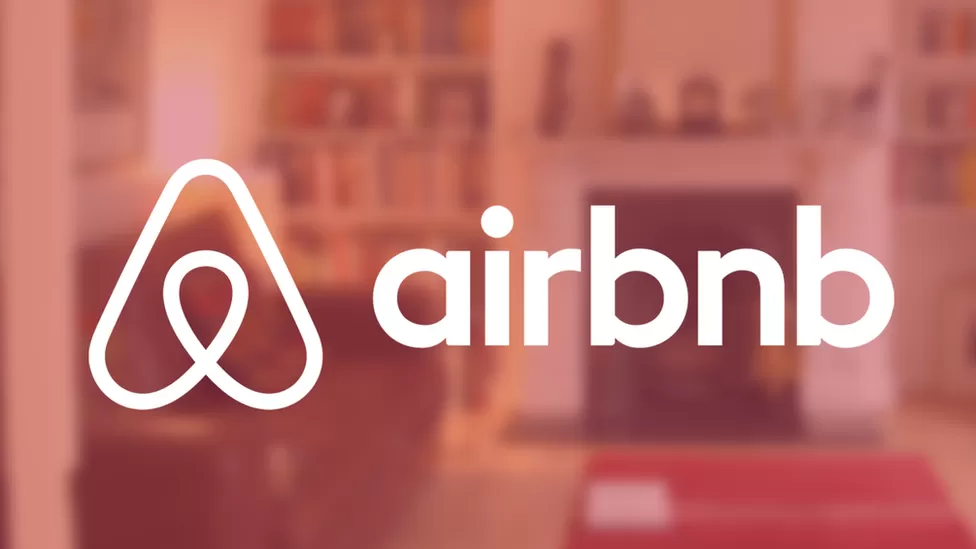

# **GitHub Link -**

Provide your GitHub Link here.

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***Data Analysis***


### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Airbnb/Airbnb NYC 2019.csv')


### Dataset First View

In [ ]:
# Dataset First
df

In [ ]:
df.head()

In [ ]:
df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

**Data Cleaning:**

Dropping duplicates.

Cleaning individual columns.

Remove the Null values from the dataset
Some Transformations

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.info()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_df=df.dropna()
null_df.info()

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

# Data Visualization

Q. How Many Types Of Rooms Available with number of rooms?




In [ ]:
# Chart - 1 visualization code

room_types=df.room_type.unique()
print(room_types)
numbers_room_types=dict(df.room_type.value_counts())
print(numbers_room_types)


room_types=list(numbers_room_types.keys())
total_rooms=list(numbers_room_types.values())
colors=('orange','violet','green')
plt.pie(total_rooms, labels=room_types, colors=colors)
plt.title('Availabe Rooms With Its Types')
plt.show()

 Q. What is the average preferred price by customers according to the location?

In [ ]:
avg_pre_pri=df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_pre_pri

Q. Unstack the group by information for plot the graph

In [ ]:

avg_pre_pri=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_pre_pri


Q. Graph of average price of property according to location

In [ ]:

avg_pre_pri.plot.bar()

Q. No. of active host per location (Where most of the host focused to own property?

In [ ]:
df.columns

In [ ]:
host_per_loc=df.groupby('neighbourhood_group', as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
host_per_loc

We can use this code also...

In [ ]:
host_per_loc=df.groupby('neighbourhood_group')['host_id'].count()
host_per_loc

In [ ]:
plt.plot(host_per_loc)
plt.xlabel('No.of Host')
plt.ylabel('location')
plt.title('No.Of Host as per Location')
plt.show

In [ ]:
df.describe()

**Points to be noted:**

Here we can see that there is minimum price 0$.We have to fix it anyway because Airbnb is not provide free stay in any hotel.
Solution: For that we check where the price is 0. We create one funtion in which as per minimum nights the price will be set as per formula [Refer below cells for more detail]

There are some entries in dataset in which minimum nights = 1 but it's respective price is 0
Solution: We replace the price value with the mean value of price which amount is less than 100$. [Refer below cells for more detail]

In [ ]:
#airbnb_df[airbnb_df['minimum_nights'] ==1].sort_values(['price', 'minimum_nights'], ascending=[True, True])
df [ df['minimum_nights'] ==1 ].sort_values(['price','minimum_nights'], ascending=[True, True])

In [ ]:

#Get the number of values which price is less than 100$
df.loc[df['price'] <100,'price'].count()

In [ ]:
#Make a copy of original dataframe to perform additional operation for get the desire result
price_df=df.copy()

In [ ]:
#Find the mean value of price which value is less than 100$
round(df.loc[df['price']<100,'price'].mean())

In [ ]:
#Change the value of price where minimum night = 1 and price of their property is less than 50$
#airbnb_price_df['price'] = np.where(
price_df['price']=np.where(
(price_df['price']<= 50) & (price_df['minimum_nights']==1),
round(df.loc[df['price']<100,'price'].mean()),
price_df['price'])


In [ ]:

#still 8 rows have amount = 0$
price_df[price_df['price']==0].count()

In [ ]:
#Find the observations where price
price_df[price_df['price']==0]

In [ ]:
#Function that gives a new price according to minimum night

def price_calculator(min_night):
  '''Get the price based on the minimum night you are given'''
  mean_price= round(df.loc[df['price']<100,'price'].mean())
  new_price=mean_price*min_night

  return new_price

In [ ]:
#Replace the value of price according to minimum night where price = 0$
price_df['price']=np.where(
 (price_df['price']==0), price_calculator(price_df['minimum_nights']), price_df['price']
)

In [ ]:
#our new dataset
price_df.describe()

Q. Where the customer pays the highest and lowest rent according to location?

In [ ]:

#Get the highest rent according to location
max_price_df=price_df.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending=False)
max_price_df

In [ ]:
#Get the lowest rent according to location
min_price_df=price_df.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending=True)
min_price_df

In [ ]:

#Get the combine dataframe of minimum and maximum price according to location
merge_price_df=pd.merge(max_price_df,min_price_df, on='neighbourhood_group')
merge_price_df

In [ ]:
#renaming column names
merge_price_df.rename(columns ={'price_x':'Max_Price' ,'price_y':'Min_Price','neighbourhood_group':'Location'},inplace=True)
merge_price_df

In [ ]:
#Create a copy of merge price dataframe
merge_price_df_copy=merge_price_df.copy()

In [ ]:
#Create a function for log transformation of maximum price and minimum price
def log_values(values):
  '''This function takes a price value as a input and give it's log values'''
  new_max_price = np.log2(values)

  return new_max_price



In [ ]:
#Apply above function on merge price dataframe
merge_price_df_copy['Max_Price'] = merge_price_df_copy.apply(lambda x: log_values(x['Max_Price']), axis=1)
merge_price_df_copy['Min_Price'] = merge_price_df_copy.apply(lambda x: log_values(x['Min_Price']), axis=1)


In [ ]:
merge_price_df_copy

In [ ]:
merge_price_df_copy.plot(x="Location",y=["Max_Price","Min_Price"],kind='bar')
plt.title('Maximum & Minimum Price According To Location')

In [ ]:
price_df.columns

Q. Most Popular/demanded host of Airbnb in New york

In [ ]:
#Get the host based on number of reviews
host_df=price_df.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending=False)
host_df

In [ ]:
#Get the host based on availability in a year
host_available_df=price_df.groupby(['host_id','host_name'],as_index=False)['availability_365'].mean().sort_values(['availability_365'],ascending=True)
host_available_df

In [ ]:

#Merge two dataframe based on number of reviews and availability in a year
popular_host_df=pd.merge(host_df,host_available_df,on=['host_id','host_name']).sort_values(['availability_365','number_of_reviews'],ascending=[True,False])
popular_host_df

In [ ]:

#Most popular top 5 host in new york
popular_host_df.head(5)

In [ ]:
popular_host_df.plot.scatter(x='number_of_reviews',y='availability_365',xlim=(100,1000),ylim=(10,380))
plt.ylabel("Available in year")
plt.xlabel("number of reviews")

Q. Finding Top 25 most used words from listing names

In [ ]:
#Creting empty list to store name strings
names=[]
#Getting name string from 'name' column and appending it to the empty list
for name in df.name:
  names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
  ns=str(name).split()
  return ns

#Creating empty list to store the count of words
names_count = []

#Getting name string to append it to the names_count list
for n in names:
  for word in split_name(n):
    word=word.lower()
    names_count.append(word)



In [ ]:
#Importing 'counter' library to count and generate raw data and count top 25 most used words
from collections import Counter

# Counting most common words
count_words = Counter(names_count).most_common()
count_words[:25]



In [ ]:
# Cleaning the List by removing prepositions
items_to_remove = {('in', 16733), ('the', 3869), ('to', 3827), ('of', 2993), ('-', 2272), ('a', 1909)}
top_25_cleaned = [e for e in count_words if e not in items_to_remove]
top_25 = top_25_cleaned[:25]
top_25

In [ ]:
word_count=pd.DataFrame(top_25)
word_count.rename(columns={0:'Words',1:'Counts'},inplace=True)
word_count

In [ ]:

count_viz=sns.barplot(x='Words',y='Counts',data=word_count)
#Adjusting Bar labels
count_viz.set_xticklabels(count_viz.get_xticklabels(),rotation = 90, weight = 'bold', size = '15')
count_viz.set_title('Top 25 Used Words for Listing Names')


Q. From the chart above, we see the top 25 words used in the listing name. We can use the word cloud visualization method to help us better understand the chart.


In [ ]:
#Importing WordCloud library
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n) for n in word_count.Words)
wordcloud=WordCloud(max_font_size=80, colormap='hsv', width=400, height=150).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Q. Finding Top 10 Listing Counts

In [ ]:
df['host_id'].count()

In [ ]:
#Creating DataFrame
count_host_id = list(df['host_id'].value_counts())
host_id = list(df.host_id)
listing_count= list(zip(host_id,count_host_id))
count_host_id_df= pd.DataFrame(listing_count)
count_host_id_df.rename(columns={0:'Host_Id',1:'Counts'},inplace=True)

#Storing top 10 hosts with most listings
top_host_id = count_host_id_df.head(10)
top_host_id


In [ ]:
#Plotting the Chart
viz_bar = sns.barplot(x= 'Host_Id', y= 'Counts',  data=top_host_id)
viz_bar.set_title('Hosts with most listings in New York')
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')


Q. Find total numbers of nights spend per location

In [ ]:
#  find the maximum(minimum nights) spending by customer across different neighourhood group
total_nights=df.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index()
final_nights=total_nights.sort_values('minimum_nights',ascending=True)
final_nights.head()

In [ ]:
sns.barplot(x='neighbourhood_group',y='minimum_nights',data = final_nights)
plt.title('find total no. nights spend per location')

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

Set Clear Business Goals: Define specific, measurable, attainable, relevant, and time-bound (SMART) goals for your Airbnb company. These could include targets for occupancy rates, revenue growth, customer satisfaction ratings, or expansion into new markets.

Develop a Comprehensive Business Plan: Create a detailed business plan that outlines your target market, competitive analysis, marketing strategies, financial projections, and operational plans. This plan will serve as a roadmap for your company's growth and success.

Focus on Customer Experience: Prioritize delivering exceptional customer experiences to build loyalty and positive word-of-mouth. Pay attention to every touchpoint of the guest journey, from the initial booking to check-out, and continually seek ways to exceed customer expectations.

Implement Robust Technology Solutions: Leverage technology to streamline operations, enhance guest interactions, and improve overall efficiency. Invest in a user-friendly website or app for easy booking and property management, as well as customer relationship management (CRM) software to track guest interactions and preferences.

Invest in Marketing and Branding: Develop a strong brand identity that resonates with your target audience and create marketing campaigns to increase visibility and attract potential guests. Utilize social media, online advertising, content marketing, and partnerships with local businesses or influencers to reach your target market effectively.

Optimize Pricing and Revenue Management: Implement dynamic pricing strategies that consider market demand, seasonality, and competitor rates. Regularly analyze and adjust your pricing to maximize revenue and occupancy rates while maintaining competitiveness.

Build Strong Host Relationships: Nurture positive relationships with your hosts by providing them with ongoing support, training, and resources. Encourage open communication, address their concerns, and recognize and reward exceptional host performance.

Ensure Safety and Security: Prioritize the safety and security of your guests and properties. Implement safety guidelines, perform thorough background checks on guests and hosts when necessary, and maintain clear communication channels for emergencies.

Embrace Sustainability: Incorporate sustainable practices into your operations, such as energy-efficient appliances, waste reduction initiatives, and partnerships with eco-conscious vendors. Promote your commitment to sustainability as a unique selling point for environmentally conscious travelers.

Continuous Learning and Adaptation: Stay updated with industry trends, emerging technologies, and changing guest preferences. Continuously seek feedback from guests, hosts, and staff to identify areas for improvement and adapt your strategies accordingly.

Remember, each business is unique, so it's important to tailor these solutions to fit your specific goals, target market, and competitive landscape. Regularly review your progress, track key performance indicators.

# **Conclusion**

In conclusion, Airbnb company holds significant potential in the hospitality industry. By implementing a comprehensive set of strategies and solutions, you can position your business for success and achieve your objectives. Here are the key takeaways:

Clear Business Goals: Set SMART goals that align with your vision for the company and serve as a guide for growth and success.

Customer-Centric Approach: Focus on delivering exceptional customer experiences at every touchpoint to build loyalty and positive word-of-mouth.

Technology Integration: Leverage technology solutions to streamline operations, enhance guest interactions, and improve overall efficiency.

Effective Marketing and Branding: Develop a strong brand identity, implement marketing campaigns, and utilize various channels to increase visibility and attract potential guests.

Revenue Optimization: Implement dynamic pricing strategies and revenue management techniques to maximize occupancy rates and revenue.

Host Relationship Management: Build strong relationships with hosts through ongoing support, training, and recognition, fostering a mutually beneficial partnership.

Safety and Security: Prioritize the safety and security of guests and properties, ensuring a secure and trustworthy environment.

Sustainability Initiatives: Incorporate sustainable practices into your operations to attract eco-conscious travelers and demonstrate your commitment to the environment.

Continuous Learning and Adaptation: Stay updated with industry trends, seek feedback, and adapt strategies to meet changing guest preferences and market dynamics.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***